## Assignment 4: Transformer Language Model

### *CS 4501 Natural Language Processing (Fall 2024)*

In this assignment, you will work with Transformer-based language models, specifically BERT, using Python and the Hugging Face transformers library. You will explore tokenization, contextual word representations, prompting techniques, and fine-tuning for text classification. The focus of this assignment is on applying pre-built tools and methods to understand and leverage BERT’s capabilities in various natural language processing tasks.

### Tasks
1. **Tokenization with BERT**: Use the BertTokenizer to segment text sequences and analyze BERT’s vocabulary.
2. **Word Sense Disambiguation with BERT**: Compute and visualize cosine similarity between contextual word representations.
3. **Prompting BERT**: Experiment with masked language modeling for tasks like topic classification, sentiment analysis, and factual knowledge probing.
4. **Fine-tuning BERT for Classification**: Implement and evaluate a fine-tuned BERT model using a small text classification dataset.




In [1]:
# Import required packages
import numpy as np
import torch

# Set random seeds
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

## 1. Tokenization with BertTokenizer

TODO: Use the `BertTokenizer` from the Hugging Face `transformers` library to tokenize the following text sequence:

  `["Transformers are powerful tools in natural language processing.",
"Tokenization is a crucial step in NLP."]`


In [5]:
from transformers import BertTokenizer

# Load the pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [8]:
# Tokenize the input text
texts = ["Transformers are powerful tools in natural language processing.",
         "Tokenization is a crucial step in NLP."]

for text in texts:
  # TODO: tokenize the text using tokenizer
  tokens = tokenizer.tokenize(text)

  print("Tokens:", tokens)

Tokens: ['transformers', 'are', 'powerful', 'tools', 'in', 'natural', 'language', 'processing', '.']
Tokens: ['token', '##ization', 'is', 'a', 'crucial', 'step', 'in', 'nl', '##p', '.']


TODO: Count how many subword tokens in BERT's vocabulary start with "##".



In [11]:
subword_count = 0
for token in tokenizer.vocab:
    # TODO: Count how many subword tokens start with '##' in the BERT vocabulary
    if token.startswith("##"):
        subword_count+=1

print("Number of subword tokens starting with '##':", subword_count)

Number of subword tokens starting with '##': 5828


## 2. Use BERT Representations for Word Sense Disambiguation

TODO: Use BERT's last layer representation to compute cosine similarity between different occurrences of polysemous words (words with multiple meanings) in different contexts.


In [12]:
import torch
from transformers import BertModel
import matplotlib.pyplot as plt

# Load pre-trained BERT model
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()

# Example sentences with polysemous words
sentences = [
    "I went to the bank to deposit money.",  # bank-1 (financial institution)
    "The bank offered a new loan for first-time homebuyers.",  # bank-2 (financial institution)
    "She works at a bank that specializes in investment services.",  # bank-3 (financial institution)
    "The river bank was full of fish.",  # bank-4 (the land alongside a river)
    "After the storm, the bank of the river was washed away.",  # bank-5 (the land alongside a river)
    "He sat on the grassy bank, enjoying the view of the sunset.",  # bank-6 (the land alongside a river)
]

# Get BERT representations for each sentence
representations = []
token_indices = []
for sentence in sentences:
  inputs = tokenizer(sentence, return_tensors="pt")
  outputs = model(**inputs)
  last_hidden_states = outputs.last_hidden_state

  # Find the index of "bank" in the tokenized sentence
  token_index = inputs.input_ids[0].tolist().index(tokenizer.convert_tokens_to_ids('bank'))
  token_indices.append(token_index)

  # Get the BERT representation of "bank"
  representation = last_hidden_states[0][token_index].detach().numpy()
  representations.append(representation)

# Compute cosine similarity
num_sentences = len(sentences)
similarity_matrix = np.zeros((num_sentences, num_sentences))
for i in range(num_sentences):
  for j in range(num_sentences):
    vec1 = representations[i]
    vec2 = representations[j]

    similarity = None
    # TODO: compute cosine similarity between vec1 and vec2
    similarity = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

    similarity_matrix[i, j] = similarity

# print the Cosine similarity between 'bank' occurrences in different sentences
print(f"Cosine similarity matrix:\n{similarity_matrix}")


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Cosine similarity matrix:
[[1.         0.73256558 0.75830871 0.51688361 0.43581358 0.45084441]
 [0.73256558 0.99999994 0.76052368 0.5171715  0.48687994 0.42950669]
 [0.75830871 0.76052368 1.         0.52252835 0.45136365 0.46047783]
 [0.51688361 0.5171715  0.52252835 1.         0.78341585 0.71935844]
 [0.43581358 0.48687994 0.45136365 0.78341585 1.         0.58699131]
 [0.45084441 0.42950669 0.46047783 0.71935844 0.58699131 1.        ]]


TODO: Plot the pairwise cosine similarity of different polysemy occurrences. You may refer to the code for problem 2(a) of Assignment 3.

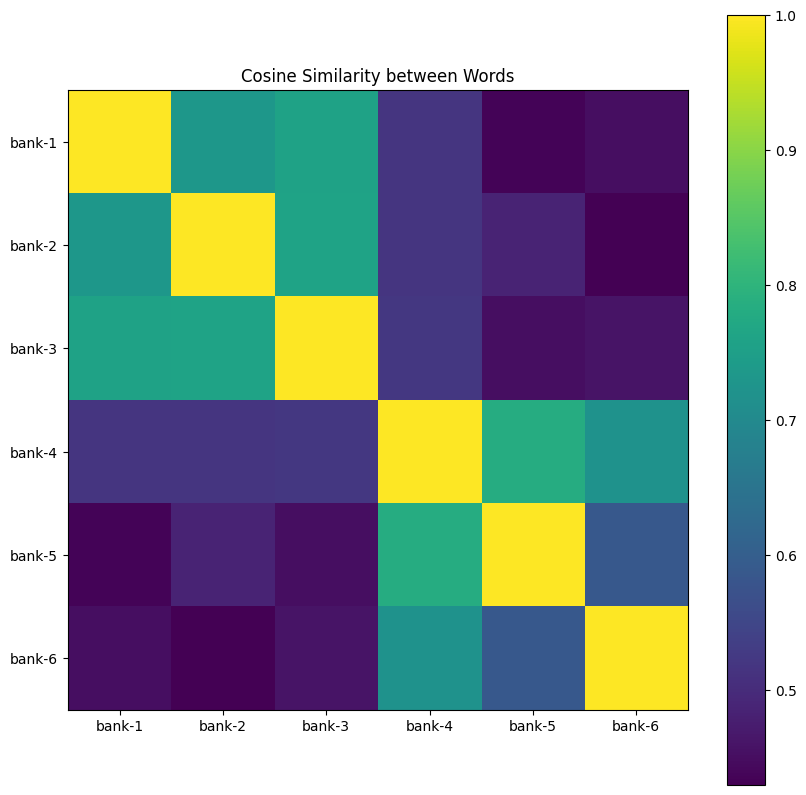

In [14]:
# TODO: visualize similarity matrix 
plt.figure(figsize=(10, 10))
plt.imshow(similarity_matrix, interpolation='nearest')


plt.colorbar()
plt.xticks(np.arange(len(sentences)), [f'bank-{i+1}' for i in range(len(sentences))])
plt.yticks(np.arange(len(sentences)), [f'bank-{i+1}' for i in range(len(sentences))])
plt.title("Cosine Similarity between Words")
plt.show()

TODO: Visualize these representations using a 2D scatter plot.

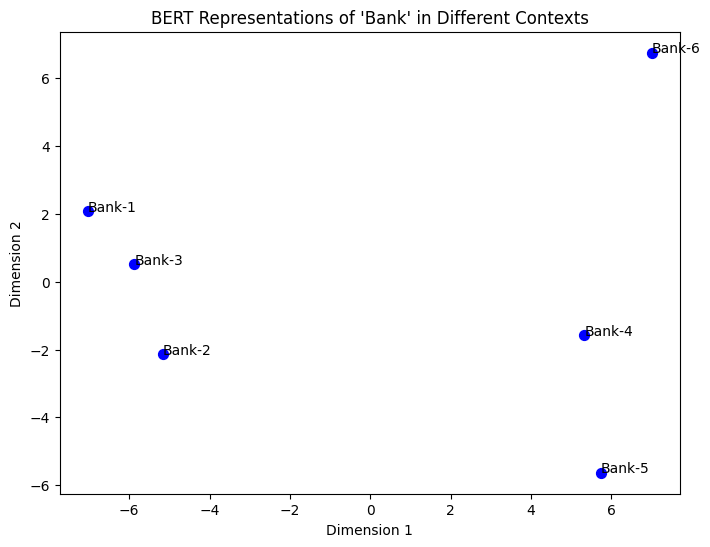

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_representations = pca.fit_transform(np.array(representations)) # 2D representation

# Visualize the representations
plt.figure(figsize=(8, 6))
for i, representation in enumerate(reduced_representations):
  # TODO: use plt.scatter() to draw the scatter plot
  plt.scatter(representation[0], representation[1], c='blue', s=50)

  # add text to each point in the plot
  plt.text(representation[0], representation[1], f"Bank-{i + 1}")

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("BERT Representations of 'Bank' in Different Contexts")
plt.show()

## 3. Prompting BERT for NLP tasks

TODO: Use BERT to fill in the blanks in sentences using the masked language modeling approach, and apply it for NLP tasks such as topic classification, sentiment classification, and factual knowledge probing.



In [18]:
from transformers import pipeline

# Load fill-mask pipeline with BERT
model = pipeline('fill-mask', model='bert-base-uncased', device=model.device)

# Use BERT to predict masked words
def predict_masked_words(sentences, model):
  for idx, sentence in enumerate(sentences):
      # TODO: use loaded pipeline model to complete the sentence
      predictions = model(sentence)

      print(f"Prediction {idx}:\n{predictions[0]}\n")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


- **Topic Classification**


In [19]:
# Example Prompts for Topic Classification
sentences = [
    "The theory of evolution and natural selection is about [MASK].",
    "Democracy and governance fall under the study of [MASK].",
    "The concept of supply and demand is fundamental to [MASK].",
]

# TODO: call predict_masked_words() to make predictions
predict_masked_words(sentences, model)

Prediction 0:
{'score': 0.3448408246040344, 'token': 6622, 'token_str': 'evolution', 'sequence': 'the theory of evolution and natural selection is about evolution.'}

Prediction 1:
{'score': 0.21643176674842834, 'token': 7072, 'token_str': 'democracy', 'sequence': 'democracy and governance fall under the study of democracy.'}

Prediction 2:
{'score': 0.5235655903816223, 'token': 5543, 'token_str': 'economics', 'sequence': 'the concept of supply and demand is fundamental to economics.'}



- **Sentiment Classification**


In [20]:
# Example Prompts for Sentiment Classification
sentences = [
    "I [MASK] buying this item, it was a wonderful experience.",
    "The weather today is gloomy, making me feel [MASK].",
    "The movie was absolutely fantastic, it was [MASK].",
]

# TODO: call predict_masked_words() to make predictions
predict_masked_words(sentences, model)

Prediction 0:
{'score': 0.6532092094421387, 'token': 3866, 'token_str': 'loved', 'sequence': 'i loved buying this item, it was a wonderful experience.'}

Prediction 1:
{'score': 0.06757467985153198, 'token': 9479, 'token_str': 'lonely', 'sequence': 'the weather today is gloomy, making me feel lonely.'}

Prediction 2:
{'score': 0.14031945168972015, 'token': 6429, 'token_str': 'amazing', 'sequence': 'the movie was absolutely fantastic, it was amazing.'}



- **Factual Knowledge Probing**

In [21]:
# Example Prompts for Factual Knowledge Probing
sentences = [
    "The capital of France is [MASK].",
    "The Great Wall of [MASK] is a famous historical structure.",
    "The United States declared independence in the year [MASK]."
]

# TODO: call predict_masked_words() to make predictions
predict_masked_words(sentences, model)

Prediction 0:
{'score': 0.416788786649704, 'token': 3000, 'token_str': 'paris', 'sequence': 'the capital of france is paris.'}

Prediction 1:
{'score': 0.28096118569374084, 'token': 2859, 'token_str': 'china', 'sequence': 'the great wall of china is a famous historical structure.'}

Prediction 2:
{'score': 0.04522893577814102, 'token': 13963, 'token_str': '1776', 'sequence': 'the united states declared independence in the year 1776.'}



## 4. Fine-tuning BERT for Text Classification


TODO: Fine-tune a BERT model using the provided training data on a text classification (e.g., sentiment classification) task.

In the following example, we use the IMDB binary sentiment classification task, where label `0` represents negative sentiment and `1` represents positive sentiment.



In [23]:
! pip install datasets
from datasets import load_dataset
from transformers import Trainer, TrainingArguments
from transformers import BertForSequenceClassification, AutoTokenizer

# Load a BertForSequenceClassification model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# Load a small text classification dataset (e.g., IMDB binary sentiment classification task)
dataset = load_dataset('imdb', split='train').shuffle(seed=42).select(range(1000))
dataset = dataset.train_test_split(test_size=0.2)

# Define a function to tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

# Apply the tokenize function to the dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
   - -------------------------------------- 1.0/25.1 MB 6.3 MB/s eta 0:00:04
   ---- ----------------------------------- 2.9/25.1 MB 7.0 MB/s eta 0:00:04
   ------- -------------------------------- 4.7/25.1 MB 7.7 MB/s eta 0:00:03
   ----------- ---------------------------- 7.3/25.1 MB 8.9 MB/s eta 0:00:02
   ----------------- ---------------------- 11.0/25.1 MB 10.6 MB/s eta 0:00:02
   ------------------------ --------------- 15.5/25.1 MB 12.5 MB/s eta 0:00:01
   -------------------------------- ------- 20.2/25.1 MB 13.9 MB/s eta 0:00:01
   ---------------------------------------  24.9/25.1 MB 14.9 MB/s eta 0:00:01
   ---------------------------------------- 25.1/25.1 MB 14.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled re


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Dwang\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

In [ ]:
! pip install --upgrade accelerate
! pip install --upgrade transformers[torch]
# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,
    per_device_train_batch_size=16,
    evaluation_strategy="epoch",
    logging_dir='./logs',
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
)

eval_log = None
# TODO: fine-tune and evaluate the BERT model using trainer.train() and trainer.evaluate()
trainer.train()
eval_log = trainer.evaluate()


print(f'Evaluation Log: {eval_log}')

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.26.0`: Please run `pip install transformers[torch]` or `pip install 'accelerate>={ACCELERATE_MIN_VERSION}'`

## Evaluate the fine-tuned BERT model

Below is a demo of using the above fine-tuned BERT model for sentiment classification. No need to present the results in this block.

In [ ]:
# Example test cases
test_sentences = [
    "This movie was fantastic!",
    "I hated this book.",
    "The service was terrible.",
    "The food was delicious."
]

# Tokenize the test sentences
inputs = tokenizer(test_sentences, padding=True, truncation=True, return_tensors="pt").to(model.device)

# Get model predictions
outputs = model(**inputs)

# Apply softmax to get probabilities
probabilities = torch.softmax(outputs.logits, dim=1)
predictions = torch.argmax(probabilities, dim=1)

# Print the predictions
for i, sentence in enumerate(test_sentences):
  print(f"Sentence: {sentence}")
  print(f"Prediction: {predictions[i].item()}")
  print("-" * 20)

TODO: evalute the fine-tuned BERT model on the test set and report the accuracy

In [ ]:
correct_predictions = 0
test_data = tokenized_datasets['test']
total_predictions = len(test_data)

wrong_prediction_sentences = []

# Iterate through the test dataset
for i in range(total_predictions):
  label = test_data[i]['label']
  inputs = tokenizer([test_data[i]['text']], padding=True, truncation=True, return_tensors="pt").to(model.device)

  # TODO (for problem 4(b)): Use the fine-tuned model to get a prediction for the test sentence
  pass

  if prediction == label:
    correct_predictions += 1
  # TODO (for problem 4(c)): collect sentences from the test set for which the fine-tuned BERT model made wrong predictions
  pass

print(f"Total correct predictions: {correct_predictions}")
print(f"Total predictions: {total_predictions}")
accuracy = correct_predictions / total_predictions
print(f"Test Accuracy: {accuracy}")